"Geo Data Science with Python" - Fall 2021
### Notebook Final Exam

This is a take-home exam. 

If you work in teams, please indicate your collaborators below.

In [4]:
NAME = "Faisal Adams"
COLLABORATORS = "Ben Eppinger"

---
---
# PART A: Theoretical Knowledge

(16 points)

Note that these exam questions are designed to deepen your understanding of Python language and data science topics. I encourage you to try to think about the answers first and formulate how you would formulate them, before you cross-check and complete them by looking up your notes or elsewhere. This is also similar to how we approach scientific writing about theoretical topics, for example for the introduction of a report or scientific paper. First we note down down our thoughts to include what we understand is important and to draft a sketch on a topic, then we reflect our draft by revising the literature, and then we use both to formulate our statements more precise. 

Grading criteria: 
- Relevancy of your statements (2 points, depending on question)
- Precision of your statements (1 point)
- Conciseness of your answer (1 point)


---
#### Question A.1: Explain the difference between a class and a function in Python
(4 points)



A class is an object oriented approach that involves the creation of an instance, which possess attributes and methods. A class may possess several methods, equivalent to having several functions. 
<br>A function is different because it receives inputs and produces outputs, and usually performs a unique set of calculations. 

---
#### Question A.3: Explain the difference between a class object and an instance object in Python.

Can one exist without the other?
Add code example for how to create a class and how to create an instance.

(4 points)


An instance object is an initiation of a class object. Therefore, and instance object cannot exist without a class object, but the reverse is not true. 

```
class Example (object):
    def __init__(self, input):
        self.input = input
    
    def method (self):
        print ('This is the value of the first input:', self.input)
        
instance = Example('Hi')
instance.method()  
```

 From the above Example() is a class object, and instance is an instance object of the Example() class.

In [5]:
# code example 
class Example (object):
    def __init__(self, input):
        self.input = input
    
    def method (self):
        print ('This is the value of the first input:', self.input)
        
instance = Example('Hi')
instance.method()

This is the value of the first input: Hi


---
#### Question A.3: Explain the difference between the matrix product and the hadamard product when combining two numpy arrays. 

Provide code example for applying both to the example matrices x and y below. Also, name example cases, for which each of them are applied!

(4 points)



Matrix product is natrix multiplicatin as determined by linear algebra. This method requires that the column in the first matrix and the rows in the second have the same dimension. 
<br>The Hadamard product is an element by element multiplication of  matrix componenets in corresponding positions so long as the dimensions of both matrices are the same. 

In [6]:
import numpy as np
x = np.array([[1,1,1],[1,1,1],[1,1,1]])
y = np.array([[2,2,2],[2,2,2],[2,2,2]])

In [7]:
# code example 
Had = x*y
MP = x@y
print ('Hadamard product:')
print(Had)

print ('\nMatrix product:')
print(MP)

Hadamard product:
[[2 2 2]
 [2 2 2]
 [2 2 2]]

Matrix product:
[[6 6 6]
 [6 6 6]
 [6 6 6]]


---
#### Question A.4: Which machine learning method(s) would you use to automatically discriminate between sounds of birds from sounds of whizzles? Explain your answer.

(4 points)


Supervised machine learning with a classification approach would be ideal. Since the data is labeled, and we have an idea of our desired output, we can use specified parameters to produce discrete outputs (bird vs whistle). 

---
---
# PART B: Practical Knowledge

(40 points + 10 extra credit)

The tasks of this part are very similar to previous exercises and intent to allow you to get some routine experience with downloading and handling large science data and analyzing them for specific regions.

---
### B.1: Getting data via OpenDAP Servers

(10 points)

At the following link you can retrieve information about groundwater and soil moisture conditions over the US from a data assimilation of remotely sensed GRACE data into a hydrological modle CLSM.

https://disc.gsfc.nasa.gov/datasets/GRACEDADM_CLSM0125US_7D_4.0/summary?keywords=GRACE%20TWS

Investigate also the readme file of the dataset (available at the same link, under the Documentation tab) and answer the following questions in the markdown cell below:

- What is the content of the variable `gws_inst`
- What is the unit of the variable `gws_inst`
- What is the basic purpose of the dataset?
- What is the meaning of low or high `gws_inst` values?

Then, via OpenDAP, retrieve data over mid-eastern USA (south of 40 degree lat, north of 33 degree lat, and east of -85 degree) during any week in the available time series but only for the variable `gws_inst`, its coordinates and its time variable. Add your code in the code cell below.

### Answer
The variable ```gws_inst``` contains data on Groundwater Percentile as a drought indicator. 
The variable ```gws_inst``` has a unit of %. 
The purpose of the dataset is to provide groundwater and soil moisture drought indicators for North America. 
Low ```gws_inst``` values imply low groundwater content, and increased probability of a drought. The opposite is true for higher values. 

In [8]:
# importing all the relevant modules required
from pydap.client import open_url
from pydap.cas.urs import setup_session
import numpy as np 
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point


In [9]:
# still receiving an "expired SSL certificate error"
# code in this cell is to bypass that error
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [10]:
# accessing the GES DISC data using a url for Jan 6th and including all coordinates and gw_inst data
url = 'https://hydro1.gesdisc.eosdis.nasa.gov/opendap/hyrax/GRACEDA/GRACEDADM_CLSM0125US_7D.4.0/2020/GRACEDADM_CLSM0125US_7D.A20200106.040.nc4?lat[0:1:223],lon[0:1:463],time[0:1:0],gws_inst[0:1:0][0:1:223][0:1:463]'

# creating a login session and assinging the data to the "data" variable 
username = 'fadams'
password = 'Herewego007'
session = setup_session (username, password, check_url=url)
data = open_url (url, session = session)

In [11]:
# assigning all the data arrays to relevant variable names
lat = data.lat[:].data
lon = data.lon[:].data
time = data.time[:].data
gw = data.gws_inst.array[:].data
lonGrid, latGrid = np.meshgrid(lon,lat)

In [12]:
# checking the attributes of the dataset to determine units and missing value
data.attributes

{'NC_GLOBAL': {'missing_value': -999.0,
  'title': 'GRACE Data Assimilation Drought Indicator',
  'version': '040',
  'input': 'CLSM_NATURE/CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc',
  'institution': 'NASA GSFC HSL',
  'source': 'Catchment',
  'history': 'created on date: 2020-10-29T10:31:11.531',
  'references': 'Houborg_etal_WRR_2012, Zaitchik_etal_JHM_2008',
  'conventions': 'CF-1.6',
  'comment': 'website: http://drought.unl.edu/MonitoringTools/NASAGRACEDataAssimilation.aspx',
  'MAP_PROJECTION': 'EQUIDISTANT CYLINDRICAL',
  'SOUTH_WEST_CORNER_LAT': 25.0625,
  'SOUTH_WEST_CORNER_LON': -124.9375,
  'DX': 0.125,
  'DY': 0.125},
 'DODS_EXTRA': {'Unlimited_Dimension': 'time'},
 'rtzsm_inst': {'units': '%',
  'standard_name': 'root_zone_soil_moisture_percentile',
  'long_name': 'Root zone soil moisture percentile',
  'cell_methods': 'time: point',
  'scale_factor': 1.0,
  'add_offset': 0.0,
  'missing_value': -999.0,
  '_FillValue': -999.0,
  'vmin': 0.213219613,
  'vmax':

In [13]:
# replacing missing values with nan
gw [gw == -999.0] = np.nan

In [14]:
# This cell calculates the new bounds based on the given conditions
# mid-eastern US bounds
minLat = 33
maxLat = 40
minLon = -85
# maxLon = -67

# indexed boundaries 
minLatBnd = np.argmin(np.abs(lat-minLat))
maxLatBnd = np.argmin(np.abs(lat-maxLat))
minLonBnd = np.argmin(np.abs(lon-minLon))
# maxLonBnd = np.argmin(np.abs(lon-maxLon))

# grid values for the new boundary conditions
latGridBnd = latGrid [minLatBnd:maxLatBnd, minLonBnd:]
lonGridBnd = lonGrid  [minLatBnd:maxLatBnd, minLonBnd:]

# new boundaries for the 1D coordinates 
latBnd = lat [minLatBnd:maxLatBnd]
lonBnd = lon [minLonBnd:]

# groundwater data within the specificed boundary conditions
gwBnd = gw [:, minLatBnd:maxLatBnd, minLonBnd:]


In [15]:
# obtaining a 2D array from the 1D lat and long arrays
lonGridBnd, latGridBnd = np.meshgrid(lonBnd, latBnd)

C:\Users\Faisal\AppData\Local\Temp/ipykernel_17648/3345136594.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh (lonGridBnd, latGridBnd, gwBnd[0])


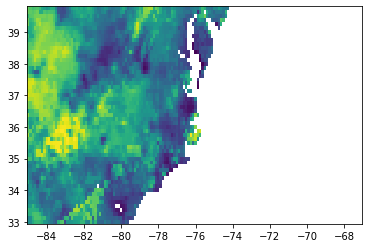

In [16]:
# plot of the resized boundaries
plt.pcolormesh (lonGridBnd, latGridBnd, gwBnd[0])

---
### B.2: Selecting data within Virginia and North Carolina

(10 points)

For the dataset above, generate two data masks that will allow you to extract only those grid cells that are located inside the state of Virginia and North Carolina. The boundaries for both states are given in the files `boundary_VA.csv` and `boundary_NC.csv`. Then plot the dataset and the boundary for the month you chose above. Describe the results (values and their spatial variablity). We will use the mask in the next step.

In [17]:
# reading in the boundary files for Virginia and North Carolina 
VA_file = np.genfromtxt('boundary_VA.csv', delimiter = ',', skip_header=1)
NC_file = np.genfromtxt('boundary_NC.csv', delimiter = ',', skip_header=1)

# creating polygons from the list of coordinates
VA_poly = Polygon (VA_file)
NC_poly = Polygon (NC_file)

# creating an array with the same dimensions as the gw data
VA_mask = np.zeros (gwBnd.shape[1:])
NC_mask = np.zeros (gwBnd.shape[1:])

# please ignore this 
combineMask = np.zeros (gwBnd.shape)

# determining the length of the lat and lon arrays
N_Lat = len (latBnd)
N_Lon = len (lonBnd)

# creating a mask for VA and NC
for i in range (N_Lon):
    for j in range (N_Lat):
         
        # creating points of the coordinates
        pt = Point (tuple((lonBnd[i], latBnd[j])))
        
        # checking if the points are inside the polygon
        VA_maskVal = (VA_poly.contains(pt))
        NC_maskVal = (NC_poly.contains(pt))
        
        # assigning integers of the booleans to the relevant mask variable 
        VA_mask [j,i] = VA_maskVal
        NC_mask [j,i] = NC_maskVal
        combineMask = VA_mask + NC_mask  
        

# VA_mask.shape

# NC_poly


C:\Users\Faisal\AppData\Local\Temp/ipykernel_17648/2307282774.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh (lonGridBnd, latGridBnd, gwBnd[0], cmap = 'nipy_spectral')


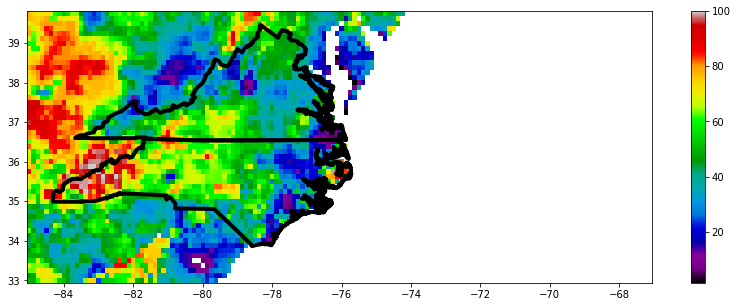

In [18]:
# Plotting the data
plt.figure(figsize = (14,5))
plt.pcolormesh (lonGridBnd, latGridBnd, gwBnd[0], cmap = 'nipy_spectral')
plt.plot (VA_file[:,0], VA_file[:,1],'k', linewidth = 4)
plt.plot (NC_file[:,0], NC_file[:,1], 'k', linewidth = 4)
plt.colorbar()

In [19]:
# using the mask to select points inside VA
VA = VA_mask * gwBnd
VA [VA<=0]=np.nan

# using the mask to select points inside NC
NC = NC_mask * gwBnd
NC [NC<=0]=np.nan

C:\Users\Faisal\AppData\Local\Temp/ipykernel_17648/3408011861.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh (lonGridBnd, latGridBnd, VA[0], cmap = 'nipy_spectral')


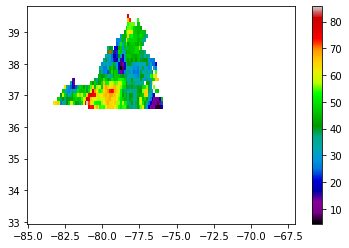

In [20]:
# checking that the mask works for VA
plt.pcolormesh (lonGridBnd, latGridBnd, VA[0], cmap = 'nipy_spectral')
plt.colorbar()

C:\Users\Faisal\AppData\Local\Temp/ipykernel_17648/840765087.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh (lonGridBnd, latGridBnd, NC[0], cmap = 'nipy_spectral')


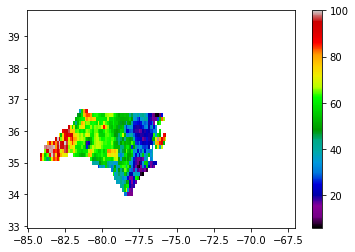

In [21]:
# checking that the mask works for NC
plt.pcolormesh (lonGridBnd, latGridBnd, NC[0], cmap = 'nipy_spectral')
plt.colorbar()

From these January plots, it is observed that coastal areas have very low groundwater storage. The values increase with increasing elevation, and seem to max out in the mountains for both Virginia and North Carolina.

---
### B.3: Analyzing time series for Virginia and North Carolina

(20 points)

Expand your retrieval of the GRACEDADM_CLSM0125US dataset to at least two successive years of your choice (you have to batch process the url-links).  You can either download the list of filenames from the NASA website or generate them automatically by updating the dates in the links.

Estimate a time series for the region average of `gws_inst` for the state of Virginia and the state of North Carolina. Plot the time series, compare and discuss the results.

In [22]:
# creating a list of file names from a txt file containg names downloaded from the GESC DISC site
file = open ('./subset_GRACEDADM.txt', 'r')
filenames = file.readlines()
file.close
filenames = [i.rstrip('\n') for i in filenames] # removing the newline character from each line 

# removing first entry because it is a README file 
filenames = filenames[1:]
filenames[0] # just checking 


'https://hydro1.gesdisc.eosdis.nasa.gov/data/GRACEDA/GRACEDADM_CLSM0125US_7D.4.0/2019/GRACEDADM_CLSM0125US_7D.A20190107.040.nc4'

In [23]:
# added a progress bare to keep track of this next step 
# the process might slow, but I promise!
from tqdm import tqdm

In [24]:
# obtaining data for 2 consecutive years, from 2019 to 2020 

# using an opendap URL as a reference 
urlRef = 'https://hydro1.gesdisc.eosdis.nasa.gov/opendap/hyrax/GRACEDA/GRACEDADM_CLSM0125US_7D.4.0/2020/GRACEDADM_CLSM0125US_7D.A20200106.040.nc4'

# finding index of the part of the url where the differeb
url_idx = urlRef.index('hyrax')

# customisations to the end of the url for variables including coordinates, time and groundwater percentile 
url_end = '?lat[0:1:223],lon[0:1:463],time[0:1:0],gws_inst[0:1:0][0:1:223][0:1:463]'

# empty list to hold all the time data for the specified duration
timeAll = []

# empty list for the groundwater storage data for VAand NC
gws_VA = []
gws_NC = []

# getiing the data for the 2 years
for i in tqdm(filenames):
        
    fname = i[(url_idx-3):] #due to some difficulty, this format is the only way I could get the right URL
    
    # url for accessing the files
    url = 'https://hydro1.gesdisc.eosdis.nasa.gov/opendap/hyrax/' + fname + url_end

    dataset = open_url (url, session = session) # opening the dataset 
    
    # extracting the gws data
    gwDataset = dataset.gws_inst.array[:].data
    
    # changing the boundaries of the dataset to match our coordinates
    gwBnd = gwDataset[:, minLatBnd:maxLatBnd, minLonBnd:]
    
    # replacing the missing values
    gwBnd[gwBnd == -999.0] = np.nan
    
    # selecting points inside VA
    gwVA = VA_mask*gwBnd
    
    # finding the mean values for VA while accounting for missing values
    gwVA_mean = np.nanmean(gwVA)
    
    # appending mean results to the empty list
    gws_VA.append(gwVA_mean)
    
    # selecting NC values, finding their mean and adding to an empty list
    gwNC = NC_mask * gwBnd
    gwNC_mean = np.nanmean(gwNC)
    gws_NC.append(gwNC_mean)
    
    # extracting the time data and appending to an empty list for time 
    tm = dataset.time[:].data
    timeAll.append(tm[0])
    


100%|████████████████████████████████████████████████████████████████████████████████| 104/104 [03:59<00:00,  2.30s/it]


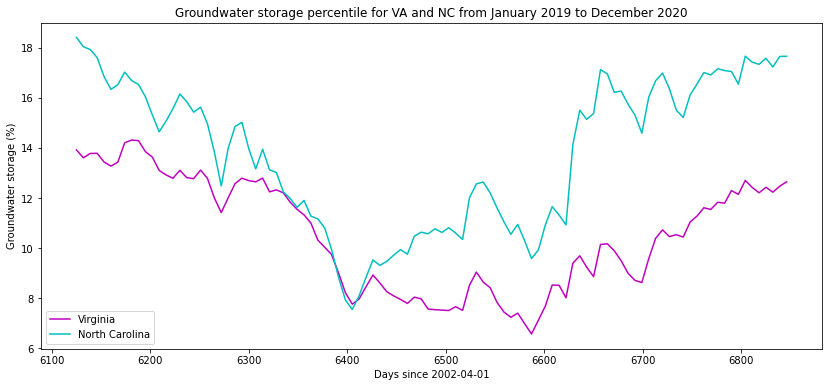

In [27]:
# plotting the results
plt.figure (figsize = (14,6))
plt.plot(timeAll, gws_VA,'m', label = 'Virginia')
plt.plot(timeAll,gws_NC, 'c',label = 'North Carolina')
plt.title ('Groundwater storage percentile for VA and NC from January 2019 to December 2020')
plt.xlabel('Days since 2002-04-01')
plt.ylabel('Groundwater storage (%)')
plt.legend ()

C:\Users\Faisal\AppData\Local\Temp/ipykernel_17648/395040686.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh (lonGridBnd, latGridBnd, gwVA[0], cmap = 'nipy_spectral')


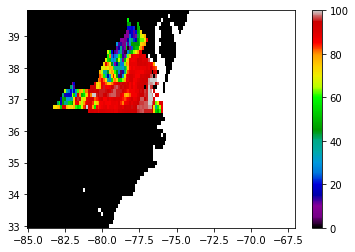

In [29]:
# just checking, please ignore
plt.pcolormesh (lonGridBnd, latGridBnd, gwVA[0], cmap = 'nipy_spectral')
plt.colorbar()


The groundwater storage for both states seems to follow a bi-annual cycle, with maximum percentages every 2 years. The maximum and minimum values both seem to occur during water too. Except for a few short instances, it seems North Carolina has consistently higher grounwater percentages than Virginia. 

---
### B.4: Explorative Exercise: Module Cartopy (extra credit)

(10 extra credit points)

Expand your Python knowledge and investigate the module `cartopy`. 

Study their documentation pages here: https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html# and here https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/advanced_plotting.html?highlight=pcolormesh
to find out how to plot your map(s) from task B.2 in any preferred projection and adding coastlines to the plot.

To install the package on your computer/webapp, if you haven't yet, use:

```python
conda install cartopy
```


In [84]:
import cartopy.crs as ccrs
# import cartopy.feature as cfeature

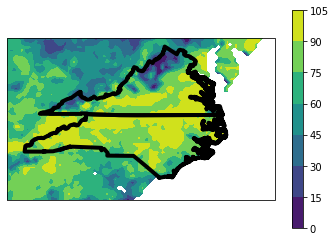

In [74]:
# Trying cartopy
ax = plt.axes(projection = ccrs.Robinson()) # Robinson projection 
plt.contourf(lonGridBnd, latGridBnd, gwBnd[0])
plt.plot (VA_file[:,0], VA_file[:,1],'k', linewidth = 4)
plt.plot (NC_file[:,0], NC_file[:,1],'k', linewidth = 4)

ax.coastlines(color = 'red')

plt.colorbar()

plt.show()